In [2]:
import pandas as pd

# Load the dataset
file_path = "Day_36 Decision_Tree_Data.csv"
df = pd.read_csv(file_path)

# Display the first five rows
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,-1.053839,-1.027544,-0.329294,0.826007,1
1,1.569317,1.306542,-0.239385,-0.331376,0
2,-0.358856,-0.691021,-1.225329,1.652145,1
3,-0.136856,0.460938,1.896911,-2.281386,0
4,-0.048629,0.502301,1.778730,-2.171053,0


In [3]:
# Compute summary statistics for each feature
df.describe()


,Feature_1,Feature_2,Feature_3,Feature_4,Target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.048848,-0.031206,0.038332,-0.027714,0.500000
std,1.230126,0.894988,1.274375,1.323957,0.502519
min,-2.523434,-1.692005,-2.683180,-2.585909,0.000000
25%,-1.097573,-0.819243,-0.989945,-1.185113,0.000000
50%,-0.035241,0.098274,-0.098046,0.069846,0.500000
75%,1.035708,0.707311,1.190847,1.089659,1.000000
max,2.388694,1.724002,2.489048,2.591239,1.000000


<ipython-input-4-4bc4288b3761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Target"], palette="viridis")


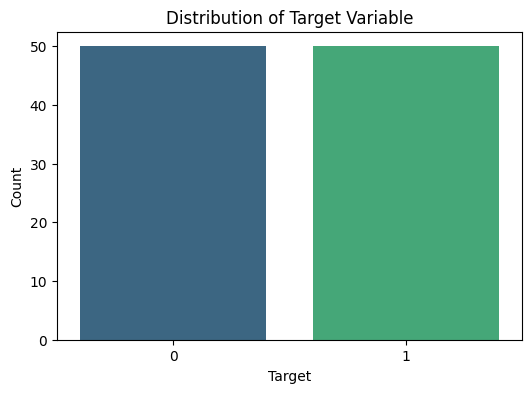

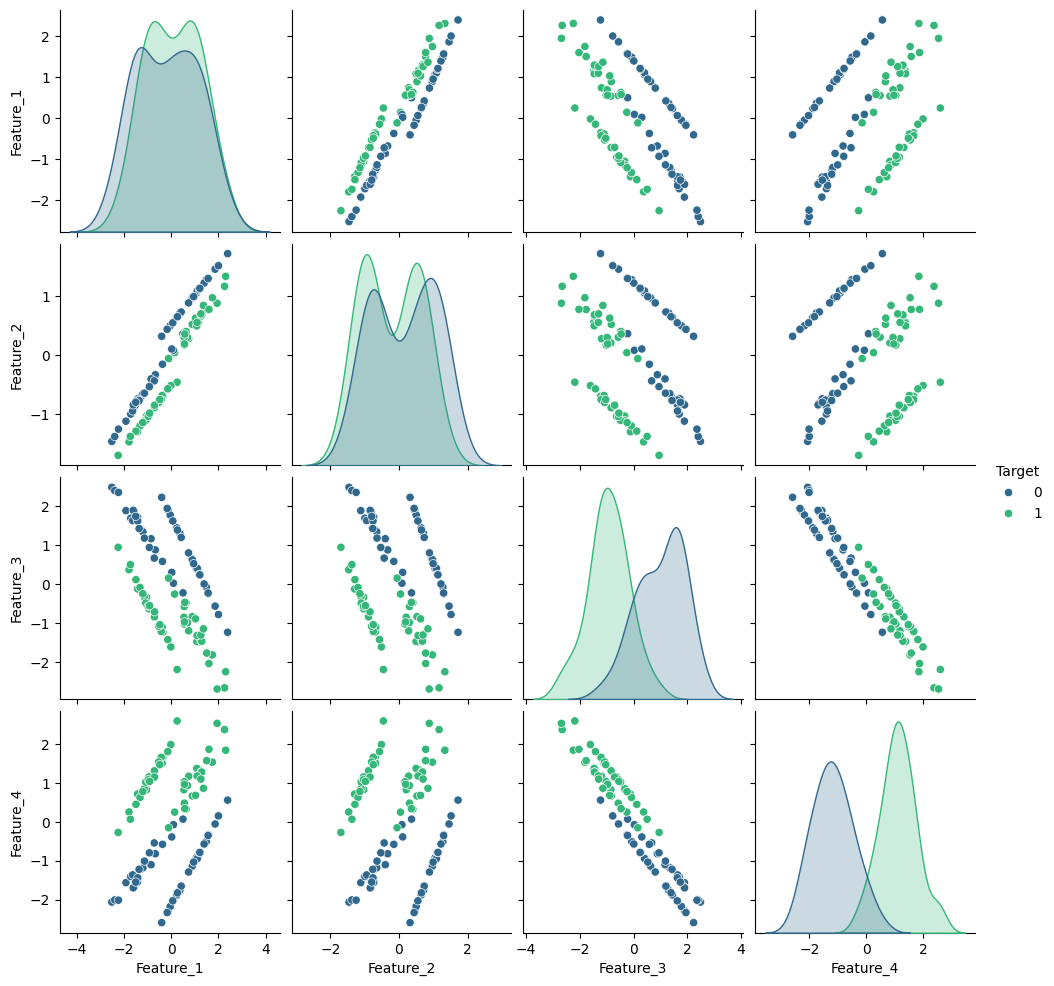

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Target"], palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Pairplot to visualize feature relationships with target variable
sns.pairplot(df, hue="Target", palette="viridis")
plt.show()


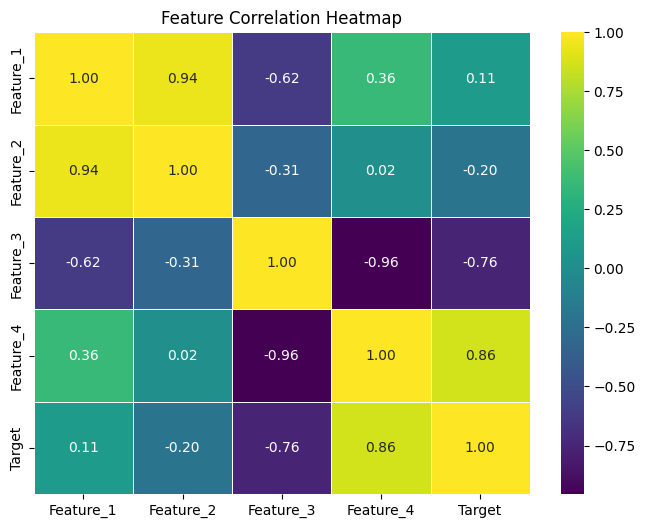

<ipython-input-5-1938c1c0a4a8>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[column], y=df["Target"], alpha=0.7, palette="viridis")
<ipython-input-5-1938c1c0a4a8>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[column], y=df["Target"], alpha=0.7, palette="viridis")
<ipython-input-5-1938c1c0a4a8>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[column], y=df["Target"], alpha=0.7, palette="viridis")
<ipython-input-5-1938c1c0a4a8>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[column], y=df["Target"], alpha=0.7, palette="viridis")


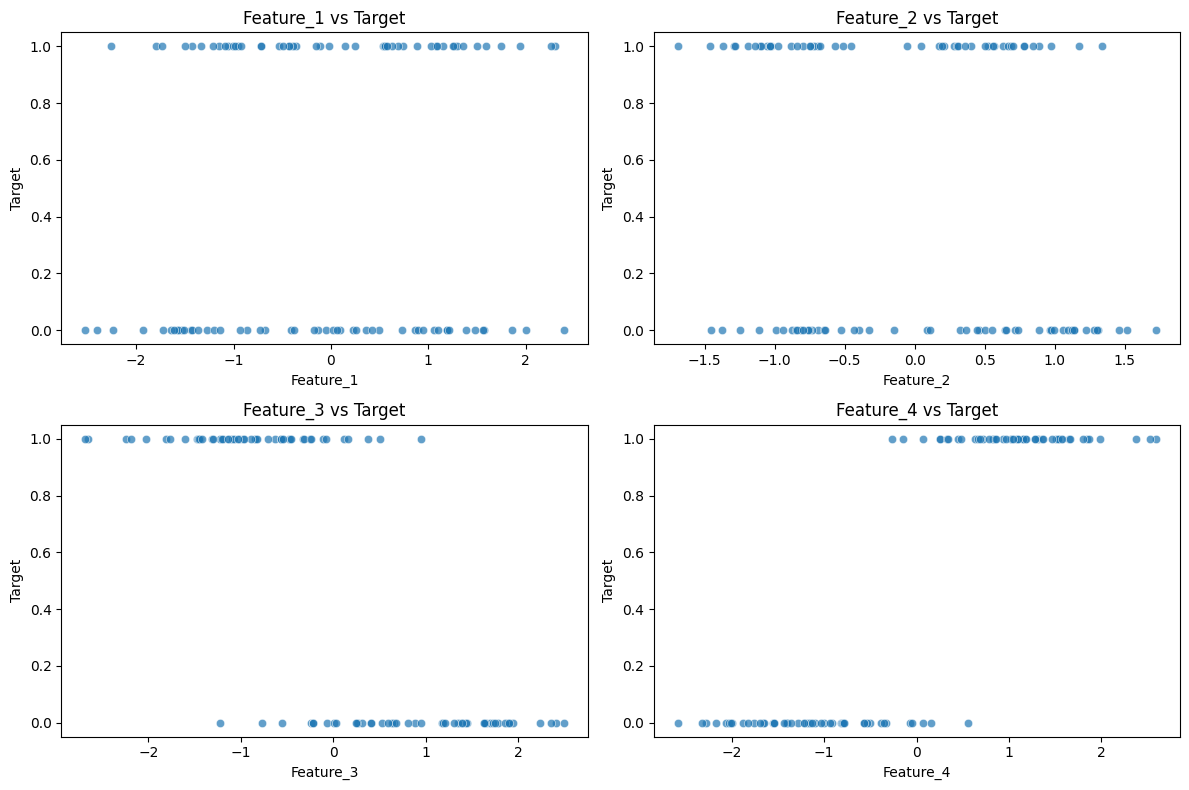

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter plots of features against the target variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[column], y=df["Target"], alpha=0.7, palette="viridis")
    plt.xlabel(column)
    plt.ylabel("Target")
    plt.title(f"{column} vs Target")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset into features and target variable
X = df.drop(columns=["Target"])
y = df["Target"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.9, 0.8571428571428571, 1.0, 0.9230769230769231)

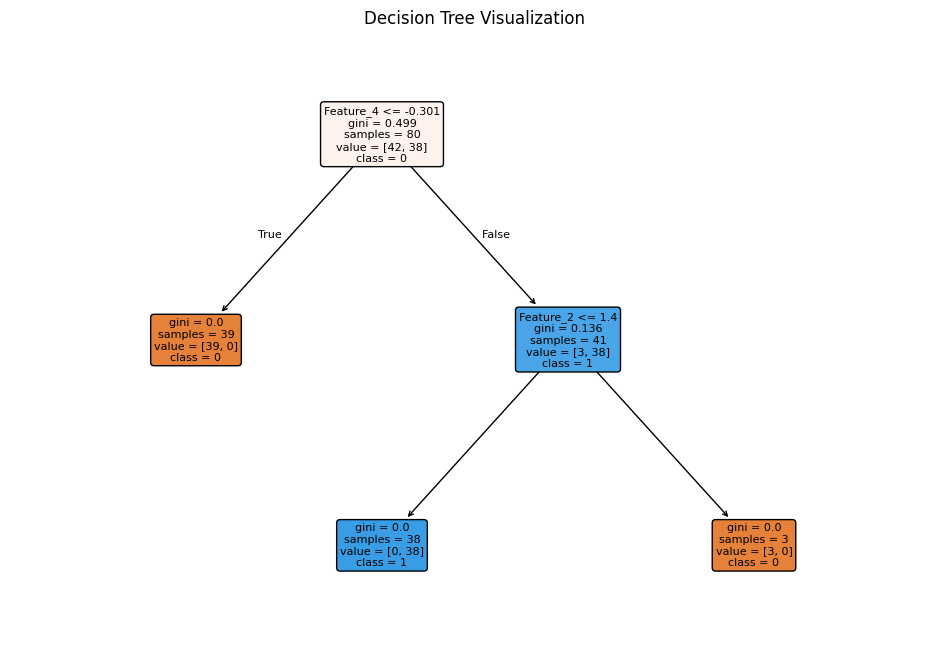

In [7]:
from sklearn.tree import plot_tree

# Plot the Decision Tree structure
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()
